<a href="https://colab.research.google.com/github/enakai00/rl_book_solutions/blob/master/Chapter02/multi_armed_bandits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
from numpy import random
from pandas import DataFrame

In [0]:
class Bandit:
  def __init__(self, arms=10):
    self.arms = arms
    self.means = random.normal(loc=0.0, scale=1.0, size=arms)
      
  def select(self, arm):
    reward = random.normal(loc=self.means[arm], scale=1.0)
    if arm == np.argmax(self.means):
      optimal = 1
    else:
      optimal = 0
    return reward, optimal
  
  def disturb(self):
    self.means += random.normal(loc=0.0, scale=0.01, size=self.arms)

## Stationary problem

In [0]:
def episode(bandit, epsilon, steps):

  def get_action(qs, epsilon):
    if random.random() < epsilon: # explore
      return random.randint(0, len(qs))
    return np.argmax(qs)


  rewards, optimals = [], []
  qs = np.zeros(bandit.arms)
  count = np.zeros(bandit.arms)
  
  for i in range(steps):
    arm = get_action(qs, epsilon)
    reward, optimal = bandit.select(arm)

    count[arm] += 1
    qs[arm] += (reward - qs[arm]) / count[arm]
    
    rewards.append(reward)
    optimals.append(optimal)
    
  return np.array(rewards), np.array(optimals)

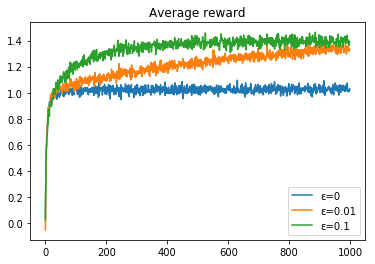

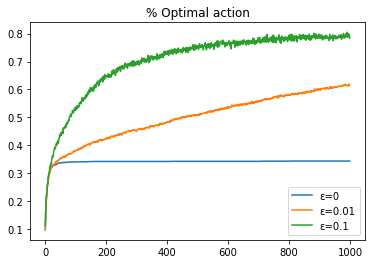

In [0]:
steps, trials = 1000, 2000
epsilons = [0, 0.01, 0.1]

rewards_summary, optimals_summary = {}, {}

for epsilon in epsilons:
  avg_rewards, avg_optimals = 0, 0

  for trial in range(trials):
    bandit = Bandit(arms=10)
    rewards, optimals = episode(bandit, epsilon, steps)
    avg_rewards += (rewards - avg_rewards) / (trial + 1)
    avg_optimals += (optimals - avg_optimals) / (trial + 1)

  rewards_summary['ε={}'.format(epsilon)] = avg_rewards
  optimals_summary['ε={}'.format(epsilon)] = avg_optimals

DataFrame(rewards_summary).plot(title='Average reward')
DataFrame(optimals_summary).plot(title='% Optimal action')

## Nonstationary problem

In [0]:
def episode(bandit, epsilon, steps):

  def get_action(qs, epsilon):
    if random.random() < epsilon: # explore
      return random.randint(0, len(qs))
    return np.argmax(qs)


  rewards, optimals = [], []
  qs = np.zeros(bandit.arms)
  count = np.zeros(bandit.arms)
  
  for i in range(steps):
    arm = get_action(qs, epsilon)
    reward, optimal = bandit.select(arm)

    count[arm] += 1
    qs[arm] += (reward - qs[arm]) / count[arm]
    
    rewards.append(reward)
    optimals.append(optimal)
    bandit.disturb() # nonstationary
    
  return np.array(rewards), np.array(optimals)

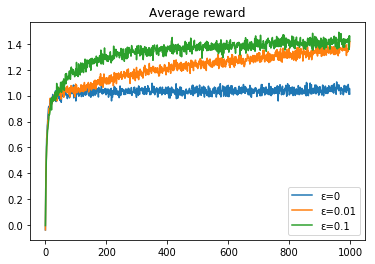

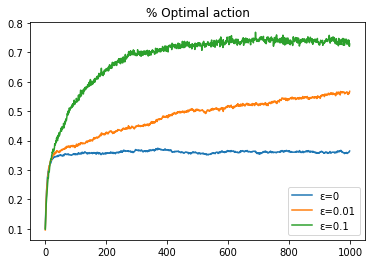

In [0]:
steps, trials = 1000, 2000
epsilons = [0, 0.01, 0.1]

rewards_summary, optimals_summary = {}, {}

for epsilon in epsilons:
  avg_rewards, avg_optimals = 0, 0

  for trial in range(trials):
    bandit = Bandit(arms=10)
    rewards, optimals = episode(bandit, epsilon, steps)
    avg_rewards += (rewards - avg_rewards) / (trial + 1)
    avg_optimals += (optimals - avg_optimals) / (trial + 1)

  rewards_summary['ε={}'.format(epsilon)] = avg_rewards
  optimals_summary['ε={}'.format(epsilon)] = avg_optimals

DataFrame(rewards_summary).plot(title='Average reward')
DataFrame(optimals_summary).plot(title='% Optimal action')

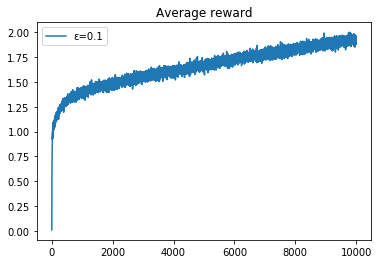

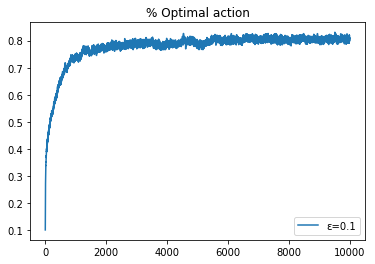

In [0]:
def episode(bandit, epsilon, steps):
 
  def get_action(qs, epsilon):
    if random.random() < epsilon: # explore
      return random.randint(0, len(qs))
    return np.argmax(qs)


  rewards, optimals = [], []
  qs = np.zeros(bandit.arms)
  
  for i in range(steps):
    arm = get_action(qs, epsilon)
    reward, optimal = bandit.select(arm)

    qs[arm] += (reward - qs[arm]) * 0.1
    
    rewards.append(reward)
    optimals.append(optimal)
    bandit.disturb()
    
  return np.array(rewards), np.array(optimals)


steps, trials = 10000, 2000
epsilons = [0.1]

rewards_summary, optimals_summary = {}, {}

for epsilon in epsilons:
  avg_rewards, avg_optimals = 0, 0

  for trial in range(trials):
    bandit = Bandit(arms=10)
    rewards, optimals = episode(bandit, epsilon, steps)
    avg_rewards += (rewards - avg_rewards) / (trial + 1)
    avg_optimals += (optimals - avg_optimals) / (trial + 1)

  rewards_summary['ε={}'.format(epsilon)] = avg_rewards
  optimals_summary['ε={}'.format(epsilon)] = avg_optimals

DataFrame(rewards_summary).plot(title='Average reward')
DataFrame(optimals_summary).plot(title='% Optimal action')

## UCB

In [0]:
def episode(bandit, epsilon, steps):

  def get_action(qs, epsilon):
    if random.random() < epsilon: # explore
      return random.randint(0, len(qs))
    return np.argmax(qs)
 
  rewards, optimals = [], []
  qs = np.zeros(bandit.arms)
  count = np.zeros(bandit.arms)
  
  for i in range(steps):
    arm = get_action(qs, epsilon)
    reward, optimal = bandit.select(arm)

    count[arm] += 1
    qs[arm] += (reward - qs[arm]) / count[arm]
    
    rewards.append(reward)
    optimals.append(optimal)
    
  return np.array(rewards), np.array(optimals)


def episode_ucb(bandit, steps):

  def get_ucb_action(qs, t, count):
    ucb_qs = [qs[arm]+2*np.sqrt(np.log(t+1)/(count[arm]+1))
              for arm in range(len(count))]
    return np.argmax(ucb_qs)


  rewards, optimals = [], []
  qs = np.zeros(bandit.arms)
  count = np.zeros(bandit.arms)

  for i in range(steps):
    arm = get_ucb_action(qs, i, count)
    reward, optimal = bandit.select(arm)

    count[arm] += 1
    qs[arm] += (reward - qs[arm]) / count[arm]
    
    rewards.append(reward)
    optimals.append(optimal)
    
  return np.array(rewards), np.array(optimals)

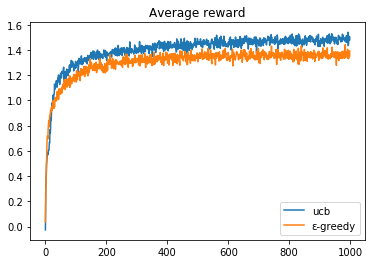

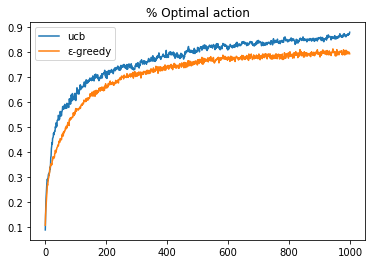

In [0]:
steps, trials = 1000, 2000

rewards_summary, optimals_summary = {}, {}

# epsilon-gredy
avg_rewards, avg_optimals = 0, 0

for trial in range(trials):
  bandit = Bandit(arms=10)
  rewards, optimals = episode(bandit, epsilon, steps)
  avg_rewards += (rewards - avg_rewards) / (trial + 1)
  avg_optimals += (optimals - avg_optimals) / (trial + 1)

rewards_summary['ε-greedy'] = avg_rewards
optimals_summary['ε-greedy'] = avg_optimals

# UCB
avg_rewards, avg_optimals = 0, 0

for trial in range(trials):
  bandit = Bandit(arms=10)
  rewards, optimals = episode_ucb(bandit, steps)
  avg_rewards += (rewards - avg_rewards) / (trial + 1)
  avg_optimals += (optimals - avg_optimals) / (trial + 1)

rewards_summary['ucb'] = avg_rewards
optimals_summary['ucb'] = avg_optimals
  
DataFrame(rewards_summary).plot(title='Average reward')
DataFrame(optimals_summary).plot(title='% Optimal action')